In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px

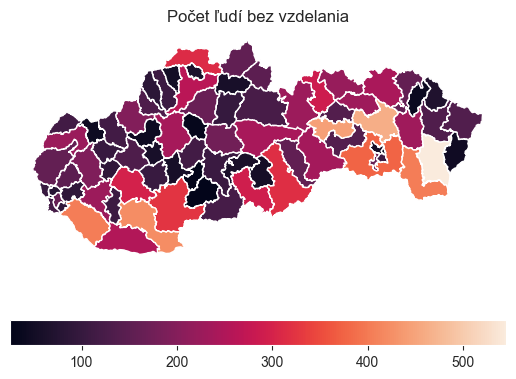

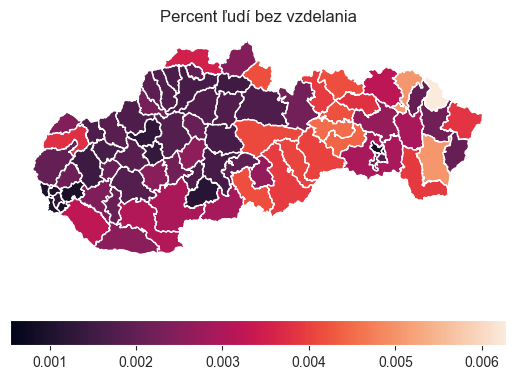

In [2]:
url = "https://bbrejova.github.io/viz/data/districts.json"
districts = gpd.read_file(url).rename(columns={'LAU1_CODE':'Kód okresu'}).set_index('Kód okresu')

table = pd.read_csv('data\RV_O_040_L_OK_SK.CSV', sep=';')
table0 = table[table["Vzdelanie"] != 'bez školského vzdelania – osoby vo veku 15 rokov a viac'].groupby('Kód okresu')['abs.'].sum()
table1 = table[table["Vzdelanie"] == 'bez školského vzdelania – osoby vo veku 15 rokov a viac']
table1 = table1[table1["Súčasná ekonomická aktivita"] != 'žiak základnej školy'].groupby('Kód okresu')['abs.'].sum()
table2 = table1/table0
geotable1 = gpd.GeoDataFrame(table1, geometry=districts['geometry'])
geotable2 = gpd.GeoDataFrame(table2, geometry=districts['geometry'])

plot = geotable1.plot(column = 'abs.', legend=True, legend_kwds={"orientation": "horizontal"})
plot.set_title("Počet ľudí bez vzdelania")
plot.set_axis_off()

plot = geotable2.plot(column = 'abs.', legend=True, legend_kwds={"orientation": "horizontal"})
plot.set_title("Percent ľudí bez vzdelania")
plot.set_axis_off()

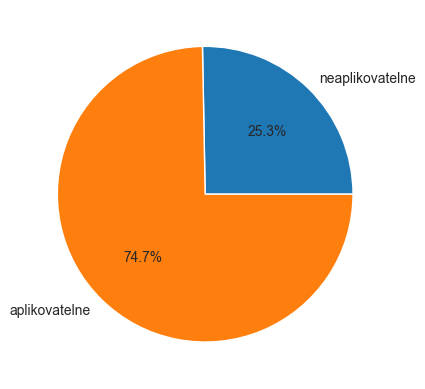

In [3]:
table = pd.read_csv('data\RV_O_067_R_SR_SK.CSV', sep=';')
table = pd.DataFrame(table.query("Vzdelanie == 'bez školského vzdelania – osoby vo veku 15 rokov a viac'")
         .groupby('Zamestnanie (ISCO - triedy)')['abs.'].sum().sort_values(ascending=False)).reset_index()
table = table[table['Zamestnanie (ISCO - triedy)']!='nezistené']
neaplikovatelne = sum(table[table['Zamestnanie (ISCO - triedy)']=='neaplikovateľné']['abs.'])
table = table[table['Zamestnanie (ISCO - triedy)']!='neaplikovateľné']
aplikovatelne = sum(table['abs.'])

plt.pie([neaplikovatelne, aplikovatelne], labels=['neaplikovatelne', 'aplikovatelne'], autopct='%1.1f%%')
plt.show()

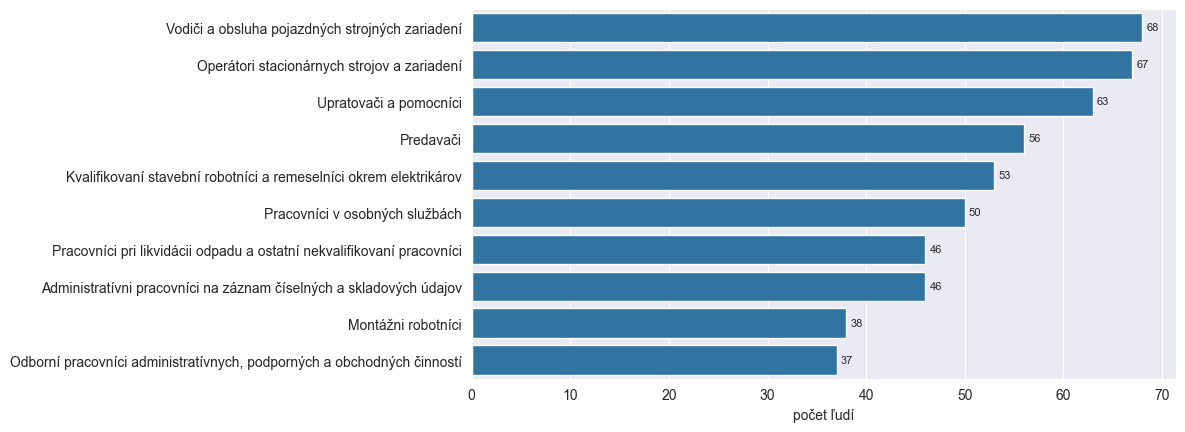

In [4]:
plot = sns.barplot(data=table.head(10), x='abs.', y='Zamestnanie (ISCO - triedy)')
plot.bar_label(plot.containers[0], fontsize=8, padding=3)
plot.set_xlabel('počet ľudí')
plot.set_ylabel('')
plt.subplots_adjust(left=0.5, right=1.6)

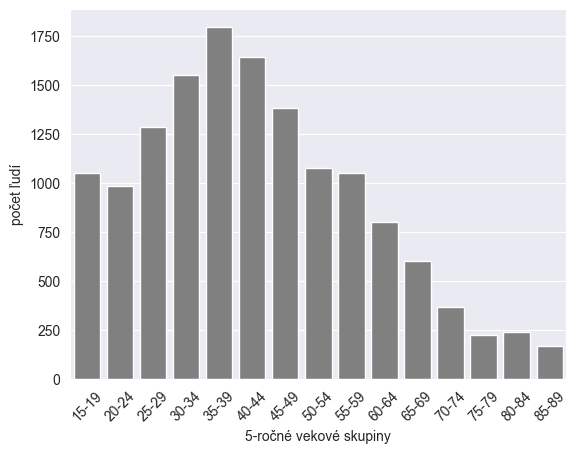

In [5]:
table = pd.read_csv('data\RV_O_040_R_SR_SK.CSV', sep=';')
table = table[table['Vzdelanie'] == 'bez školského vzdelania – osoby vo veku 15 rokov a viac']
table = table[table['Súčasná ekonomická aktivita'] != 'žiak základnej školy']

def f(vek):
    vek0 = vek - vek%5
    return f'{vek0}-{vek0+4}'

table = table[table['Vek'] != '90 a viac rokov']
table['5-rocne skupiny'] = table['Vek'].apply(int).apply(f)

table = pd.DataFrame(table.groupby('5-rocne skupiny')['abs.'].sum()).reset_index()
plot = sns.barplot(data=table, x="5-rocne skupiny", y="abs.", color='grey')
plot.set_xlabel('5-ročné vekové skupiny')
plot.set_ylabel('počet ľudí')
plt.xticks(rotation=45)
plt.show()